## Вариант № 5
### Разделение Моря

1. Для решения задачи реализовать алгоритмы одномерной минимизации функции без производной: метод дихотомии, метод золотого сечения, метод Фибоначчи , метод парабол и комбинированный метод Брента. 
<br>
2. Сравнить методы по кличеству итераций и количеству вычислений функции в зависимости от разной точности. Для каждого метода обязательно указать, как изменяется отрезок при переходе к следующей итерации. 
<br>
3. Протестировать реализованные алгоритмы для задач минимизации многомодальных функций, например, на различных полиномах. Могут ли метода золотого сейчения/Брента не найти локальный минимум многомодальной функции? 
<br>


Моисеевой рукой раздвинулись воды и со стороны берега море описывается функцией: 
$$y(x)=e^{sin(x)}\cdot x^2$$
Необходимо найти наиболее низкую точку расступившихся волн, чтобы выйти максимально сухим из воды. 

In [ ]:
import numpy as np
import seaborn as sns
iteration_count=[0,0,0,0,0]
function_call=[0,0,0,0,0]
accuracy=[0.2,0.1,0.01,0.001]
a=-5
b=2
eps=0.01
def f(x):
  return np.exp(np.sin(x))*x**2

1. Метод дихотомии 
<br>
Функция принимает четыре аргумента: f — минимизируемая функция, a и b — нижняя и верхняя границы интервала поиска, а eps — желаемая точность.
<br><br>
В реализации используется цикл while, который продолжается до тех пор, пока длина интервала поиска не станет меньше eps. На каждой итерации вычисляется середина "с" интервала поиска, и значения функции в c-eps и c+eps сравниваются, чтобы определить, какой подинтервал имеет наименьшее значение функции. 
<br><br>
Затем интервал поиска обновляется соответствующим образом. Наконец, расчетный минимум возвращается как среднее значение нижней и верхней границ конечного интервала поиска.
<br><br>
Обратите внимание, что эта реализация предполагает, что функция непрерывна на интервале поиска и что в интервале есть только один минимум. Если эти предположения не выполняются, алгоритм может не сходиться к истинному минимуму или может сходиться к локальному минимуму вместо глобального минимума.
<br><br>
**При каждой итерации метода дихотомии отрезок делится на две части пополам. Затем выбирается одна из двух полученных половинок на основе значения функции в двух точках, расположенных на равном расстоянии от центра отрезка. Выбирается та половинка, в которой значение функции меньше. Таким образом, отрезок с каждой итерацией уменьшается в два раза и сдвигается в сторону более оптимальной точки минимума.**

In [ ]:
import math 
def dichotomy_method(a, b, eps, f): 
  function_call[0]=0
  iteration_count[0]=0
  delta=eps/3
  while abs(b - a) > eps:
    iteration_count[0]+=1
    x1 = (a + b) / 2  - delta   
    x2 = (a + b) / 2  + delta
    if f(x1) < f(x2): 
      function_call[0]+=2        
      b = x2     
    else:    
      function_call[0]+=2     
      a = x1 
  return round((a + b) / 2, 4)


2. Метод золотого сечения
<br><br>
**В каждой итерации выбирается две точки на этом отрезке, расположенные на расстоянии золотого сечения от концов отрезка, и вычисляются значения функции в этих точках. Затем сравниваются значения функции в этих точках и отбрасывается та половина отрезка, на которой значение функции больше. Таким образом, на каждой итерации отрезок уменьшается в два раза.**


In [ ]:
def golden_section(a, b, eps, f): 
  function_call[1]=0
  iteration_count[1]=0
  phi = 1 - (math.sqrt(5) - 1) / 2
  x1 = a + phi * (b - a)
  x2 = b - phi * (b - a)
  f1, f2 = f(x1), f(x2)
  function_call[1]+=2 
  while abs(b - a) > eps:  
    iteration_count[1]+=1   
    if f1 < f2:
        b, x2, f2 = x2, x1, f1
        x1 = a + phi * (b - a)
        f1 = f(x1)
        function_call[1]+=1 
    else:
        a, x1, f1 = x1, x2, f2
        x2 = b - phi * (b - a)
        f2 = f(x2)
        function_call[1]+=1 
  return (a + b) / 2

3. Метод Фибоначчи <br>
**Отрезок изменяется в золотом соотношении, то есть на каждой итерации отрезок делится на две части в соотношении Фибоначчи. Каждый раз выбирается точка x1 или x2, в зависимости от того, какая из двух точек даёт меньшее значение функции f(x). После этого отрезок заменяется соответствующей частью от предыдущего отрезка, и вычисляется новая точка x1 или x2 в соотношении Фибоначчи. Таким образом, отрезок уменьшается на золотое соотношение на каждой итерации.**

In [ ]:
def fibonacci(n):
  if n <= 0:
    return 0
  elif n == 1:
    return 1
  else:
    return fibonacci(n-1) + fibonacci(n-2)


In [ ]:

def fibonacci_search(a, b, eps, f):
  function_call[2]=0
  iteration_count[2]=0

  Fn = (b-a)/eps
  n=1
  while(Fn>fibonacci(n)):
    n+=1

  x1 = a + (fibonacci(n-2)/fibonacci(n))*(b-a)
  x2 = a + (fibonacci(n-1)/fibonacci(n))*(b-a)

  f1, f2 = f(x1), f(x2)
  function_call[2]+=2
  for i in range(n-1):
    iteration_count[2]+=1
    if f1 < f2:
      b = x2
      x2 = x1
      f2 = f1
      x1 = a + (fibonacci(n-i-3)/fibonacci(n-i-1))*(b-a)
      f1 = f(x1)
      function_call[2]+=1
    else:
      a = x1
      x1 = x2
      f1 = f2
      x2 = a + (fibonacci(n-i-2)/fibonacci(n-i-1))*(b-a)
      f2 = f(x2)
      function_call[2]+=1
  return (a+b)/2


4. Метод парабол 
<br>

Метод парабол - это метод одномерной оптимизации, использующий аппроксимацию функции параболой. Он основан на идее того, что если мы построим параболу, проходящую через три точки, то минимум этой параболы будет близок к минимуму исходной функции.
Алгоритм метода парабол:
1. Выбираем три начальные точки x1, x2, x3, такие что x1 < x2 < x3.
2. Вычисляем значения функции f(x) в этих точках.
3. Вычисляем коэффициенты параболы, проходящей через эти три точки.
4. Находим минимум этой параболы и обозначаем его как x_min.
5. Если x_min находится внутри интервала (x1, x3), то переходим на шаг 6. Иначе переходим на шаг 7.
6. Если разность между x_min и x2 меньше заданной точности eps, то возвращаем x_min как решение задачи. Иначе переходим на шаг 7.
7. Сужаем интервал (x1, x3) до (x2, x_min) или (x_min, x2), в зависимости от того, в какой половине интервала находится минимум. Переходим на шаг 2.
**Отрезок уменьшается в два раза на каждой итерации метода парабол. Это происходит из-за того, что на каждой итерации метод находит новую точку минимума на основе трех точек, которые лежат на текущем отрезке. При этом две из этих точек остаются на отрезке, а третья заменяется новой точкой, ближе к точке минимума. Таким образом, каждый раз отрезок сокращается в два раза, пока не будет достигнута заданная точность eps.**

In [ ]:
def parabolic_minimization(a, b, eps, f):
  function_call[3]=0
  iteration_count[3]=0
  x1, x2, x3 = a, (a+b)/2, b
  f1, f2, f3 = f(x1), f(x2), f(x3)
  function_call[3]+=3
  while abs(x3 - x1) > eps:
    iteration_count[3]+=1
    A = ((x2 - x3)*(f1 - f2) - (x1 - x2)*(f2 - f3)) / ((x1 - x2)*(x3 - x1)*(x3 - x2))
    B = ((x2**2 - x3**2)*(f1 - f2) - (x1**2 - x2**2)*(f2 - f3)) / ((x1 - x2)*(x3 - x1)*(x3 - x2))
    x_min = -B / (2*A)
    if x_min < x2:
      x1, x2, x3 = x1, x_min, x2
      f1, f2, f3 = f1, f(x_min), f2
      function_call[3]+=1
    else:
      x1, x2, x3 = x2, x_min, x3
      f1, f2, f3 = f2, f(x_min), f3
      function_call[3]+=1
  return (x1 + x3) / 2

5. Комбинированный метод Брента
<br>
Отрезок в комбинированном методе Брента изменяется следующим образом:
1. Вычисляется точка пересечения $x_m$ методом секущих или парабол.
2. Если $x_m$ находится в пределах интервала $[a, b]$ и функция в этой точке не слишком близка к нулю, то она становится новым приближением.
3. Если $f(x_m)$ близко к нулю, то алгоритм заканчивает работу и возвращает $x_m$.
4. В противном случае, вычисляется новая точка $x$ на основе $x_m$ и $x$ из предыдущей итерации.
5. Если $f(x)$ ближе к нулю, чем $f(x_m)$, то интервал сдвигается в сторону $x_m$.
6. Если $f(x)$ дальше от нуля, чем $f(x_m)$, то интервал сдвигается в сторону $x$.
7. Если ни одно из условий не выполняется, то интервал сдвигается на половину в сторону $x_m$.
Таким образом, отрезок может уменьшаться или увеличиваться в зависимости от результатов вычислений на каждой итерации.

In [ ]:
def Brent(a, b, eps, f):
    function_call[4]=0
    iteration_count[4]=0
    K = (3 - math.sqrt(5)) / 2
    x = w = v = a + K * (b - a)
    fx = fw = fv = f(x)
    function_call[4]+=1
    d = e = b - a
    while True:
        iteration_count[4]+=1
        g = e
        e = d
        u = None
        # Проверка условий, чтобы можно было применить квадратичную интерполяцию
        if x != w and x != v and w != v and fx != fw and fx != fv and fw != fv:
            # Формула квадратичной интерполяции
            u = (x*w*fv + w*v*fx + v*x*fw - v*w*fx - w*x*fw - x*v*fv) / ((fx-fw)*(w-v)*(x-w) + (fw-fv)*(v-x)*(w-x))
            # Проверка, что найденная точка u находится внутри интервала [a+eps, b-eps]
            # и что расстояние между найденной точкой u и предыдущей точкой x меньше половины предыдущего расстояния d
            if (a + eps <= u <= b - eps) and (abs(u - x) < g / 2):
                # Сохранение точки u в переменной u1
                u1 = u
                # Проверка, что расстояние между точками u и x меньше точности eps
                if (u - a < 2 * eps) or (b - u < 2 * eps):
                    # В случае, если расстояние между найденной точкой u и концами интервала a и b меньше
                    # двойной точности eps, то точка u1 присваивается так, чтобы расстояние между нею и серединой
                    # интервала было равно eps
                    u1 = x - math.copysign(eps, x - (a + b) / 2)
                # Проверка, что расстояние между точками u1 и x меньше точности eps
                if abs(u1 - x) < eps:
                    return u1
                # Сохранение расстояния между точками u1 и x в переменной d
                d = abs(u1 - x)
        if fx < fw:
            # Проверка условия, что x меньше середины интервала a и b
            if (u is None) and (x < (a + b) / 2):
                # Вычисление новой точки методом золотого сечения
                u = x + K * (b - x)
            elif u is None:
                # Вычисление новой точки методом золотого сечения
                u = x - K * (x - a)
            v, w, x = w, x, u
            fv, fw, fx = fw, fx, f(x)
            function_call[4]+=1
        else:
            # Проверка условия, что значение функции в точке x больше или равно значению функции в точке w
            if (u is None) and (x >= (a + b) / 2):
                # Вычисление новой точки методом золотого сечения
                u = x + K * (b - x)
            elif u is None:
                # Вычисление новой точки методом золотого сечения
                u = x - K * (x - a)
            v, w, x = w, x, u
            fv, fw, fx = fw, fx, f(x)
            function_call[4]+=1
        if abs(b - a) < eps:
            break
        if fx < fw:
            d = e
            e = b - x
        if fx >= fw:
            d = e
            e = x - a
    return x

In [ ]:
print(golden_section(a,b,eps, f))
print(dichotomy_method(a,b,eps, f))
print(fibonacci_search(a,b,eps, f))
print(parabolic_minimization(a,b,eps, f))
print(Brent(a,b,eps, f))
print(function_call)
print(iteration_count)

0.0018863252448239267
-0.0001
0.003546099290779991
-0.0027941202079570186
-0.0010856067555053382
[24, 16, 17, 11, 12]
[12, 14, 15, 8, 12]


In [ ]:
for i in accuracy:
  print(f"При точности = {i}")
  golden_section(a,b,i,f)
  dichotomy_method(a,b,i,f)
  fibonacci_search(a,b,i,f)
  parabolic_minimization(a,b,i,f)
  Brent(a,b,i,f)
  print(f"{function_call} - количество вызовов функций")
  print(f"{iteration_count} - количество итераций")

При точности = 0.2
[14, 10, 11, 9, 9] - количество вызовов функций
[7, 8, 9, 6, 9] - количество итераций
При точности = 0.1
[16, 11, 12, 9, 9] - количество вызовов функций
[8, 9, 10, 6, 9] - количество итераций
При точности = 0.01
[24, 16, 17, 11, 12] - количество вызовов функций
[12, 14, 15, 8, 12] - количество итераций
При точности = 0.001
[30, 21, 22, 137, 12] - количество вызовов функций
[15, 19, 20, 134, 12] - количество итераций


Можем заметить, что при точности 0.001 количество вызовов функций и итераций у метода парабол стремително увеличилось больше, чем в 10 раз. Поэтому мы построили графики дважды, с учетом этой точности и без, для более наглядного сравнения работы методов на точностях в пределах сотых. 

In [ ]:
import matplotlib.pyplot as plt
accuracy=[0.2,0.1,0.01,0.001]
calls = [[14, 10, 11, 9, 9], [16, 11, 12, 9, 9], [24, 16, 17, 11, 12], [30, 21, 22, 137, 12]]
iterations = [[7, 8, 9, 6, 9], [8, 9, 10, 6, 9], [12, 14, 15, 8, 12], [15, 19, 20, 134, 12]]
methods = ['Dichotomy', 'Golden Section', 'Fibonacci', 'Parabolic', 'Brent']

table = [['Method', 'Accuracy', 'Calls', 'Iterations']]
for i in range(len(methods)):
    for j in range(len(accuracy)):
        table.append([methods[i], accuracy[j], calls[j][i], iterations[j][i]])

for row in table:
    print('{:<15} {:<10} {:<10} {:<10}'.format(*row))


Method          Accuracy   Calls      Iterations
Dichotomy       0.2        14         7         
Dichotomy       0.1        16         8         
Dichotomy       0.01       24         12        
Dichotomy       0.001      30         15        
Golden Section  0.2        10         8         
Golden Section  0.1        11         9         
Golden Section  0.01       16         14        
Golden Section  0.001      21         19        
Fibonacci       0.2        11         9         
Fibonacci       0.1        12         10        
Fibonacci       0.01       17         15        
Fibonacci       0.001      22         20        
Parabolic       0.2        9          6         
Parabolic       0.1        9          6         
Parabolic       0.01       11         8         
Parabolic       0.001      137        134       
Brent           0.2        9          9         
Brent           0.1        9          9         
Brent           0.01       12         12        
Brent           0.00

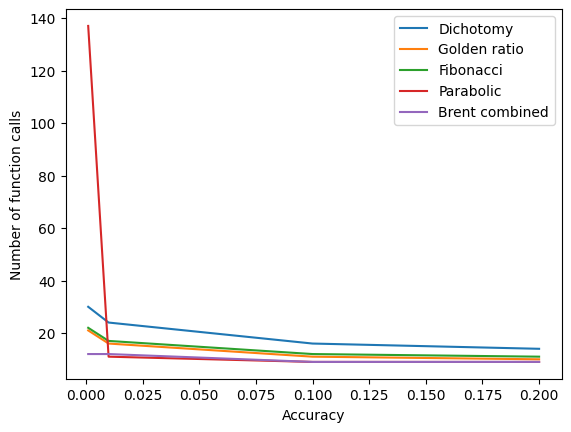

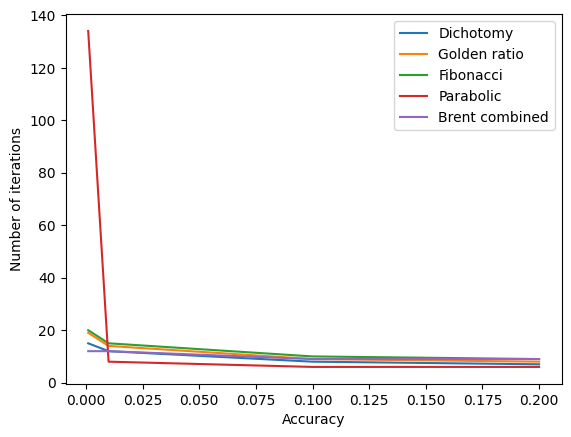

In [ ]:
accuracy = [0.2,0.1,0.01,0.001]
calls = [[14, 10, 11, 9, 9], [16, 11, 12, 9, 9], [24, 16, 17, 11, 12], [30, 21, 22, 137, 12]]
iterations = [[7, 8, 9, 6, 9], [8, 9, 10, 6, 9], [12, 14, 15, 8, 12], [15, 19, 20, 134, 12]]
methods = ['Dichotomy', 'Golden ratio', 'Fibonacci', 'Parabolic', 'Brent combined']
for i in range(len(methods)):
    plt.plot(accuracy, [calls[j][i] for j in range(len(calls))], label=methods[i])
plt.xlabel('Accuracy')
plt.ylabel('Number of function calls')
plt.legend()
plt.show()
for i in range(len(methods)):
    plt.plot(accuracy, [iterations[j][i] for j in range(len(iterations))], label=methods[i])
plt.xlabel('Accuracy')
plt.ylabel('Number of iterations')
plt.legend()
plt.show()

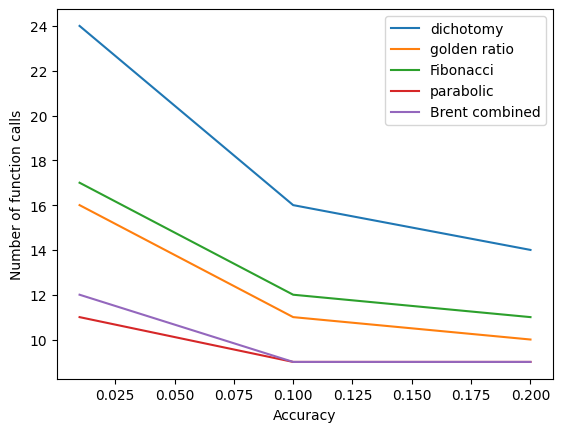

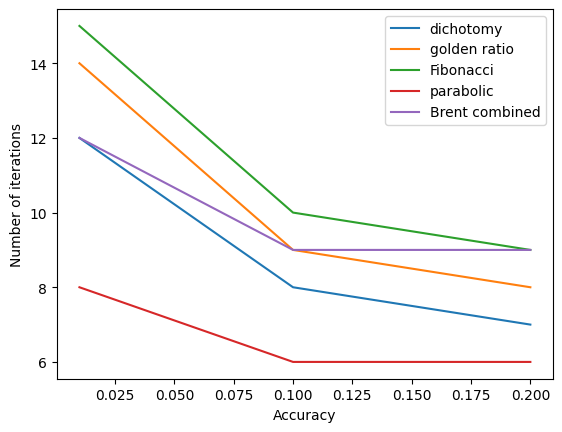

In [ ]:
accuracy = [0.2,0.1,0.01]
calls = [[14, 10, 11, 9, 9], [16, 11, 12, 9, 9], [24, 16, 17, 11, 12]]
iterations = [[7, 8, 9, 6, 9], [8, 9, 10, 6, 9], [12, 14, 15, 8, 12]]
methods = ['dichotomy', 'golden ratio', 'Fibonacci', 'parabolic', 'Brent combined']
for i in range(len(methods)):
    plt.plot(accuracy, [calls[j][i] for j in range(len(calls))], label=methods[i])
plt.xlabel('Accuracy')
plt.ylabel('Number of function calls')
plt.legend()
plt.show()
for i in range(len(methods)):
    plt.plot(accuracy, [iterations[j][i] for j in range(len(iterations))], label=methods[i])
plt.xlabel('Accuracy')
plt.ylabel('Number of iterations')
plt.legend()
plt.show()

Проверка многомодальных функций 
1. Функция Химмельблау: $f(x) = sin(x)^2+cos(x)$
2. Функция Бута: $f(x)=(x^6-15x^4+27x^2+250)$


In [ ]:
def himmelblau(x): 
    return np.sin(x)**2+np.cos(x)

def booth(x):
    return x**6 - 15 * x**4 + 27 * x**2 + 250



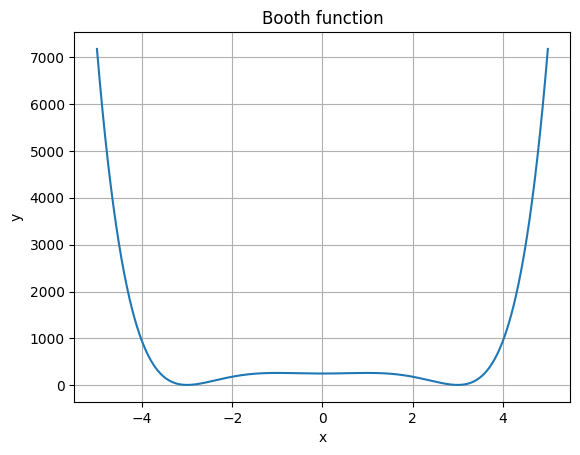

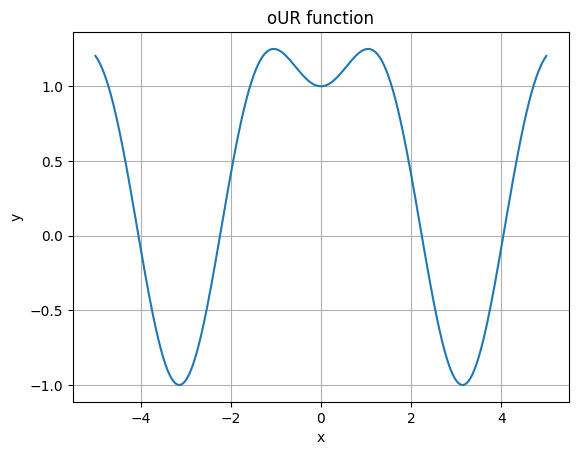

In [ ]:

x = np.linspace(-5, 5, 1000)
y = booth(x)
plt.plot(x, y)
plt.title('Booth function')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()


x = np.linspace(-5, 5, 1000)
y = himmelblau(x)
plt.plot(x, y)
plt.title('oUR function')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

In [ ]:
l = -2
r = 5

In [ ]:
print(golden_section(l,r,eps,booth))
print(dichotomy_method(l,r,eps,booth))
print(fibonacci_search(l,r,eps,booth))
print(parabolic_minimization(l,r,eps,booth))
print(Brent(l,r,eps,booth))
print(function_call)
print(iteration_count)

-2.9976275174207156
-2.999
-2.99672131147541
-0.00032059243771261563


In [ ]:
print(golden_section(l,r,eps,himmelblau))
print(dichotomy_method(l,r,eps,himmelblau))
print(fibonacci_search(l,r,eps,himmelblau))
print(parabolic_minimization(l,r,eps,himmelblau))
print(Brent(l,r,eps,himmelblau))
print(function_call)
print(iteration_count)

3.140626054908277
3.1416
3.1453900709219855
0.0014270052382262422
-0.0016988171655038643
[24, 16, 17, 15, 17]
[12, 14, 15, 12, 17]
